___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-3 (RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Indest Data

In [5]:
df = pd.read_csv('Frozen_Dessert_Production.csv',index_col='DATE', parse_dates = True)

In [7]:
df.tail()

,IPN31152N
DATE,
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263
2019-08-01,102.609
2019-09-01,101.587


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IPN31152N,573.000,109.896,27.951,58.660,88.936,107.643,128.278,196.174


In [10]:
df=df.rename(columns = {'IPN31152N':'Production'})

In [12]:
df.columns

Index(['Production'], dtype='object')

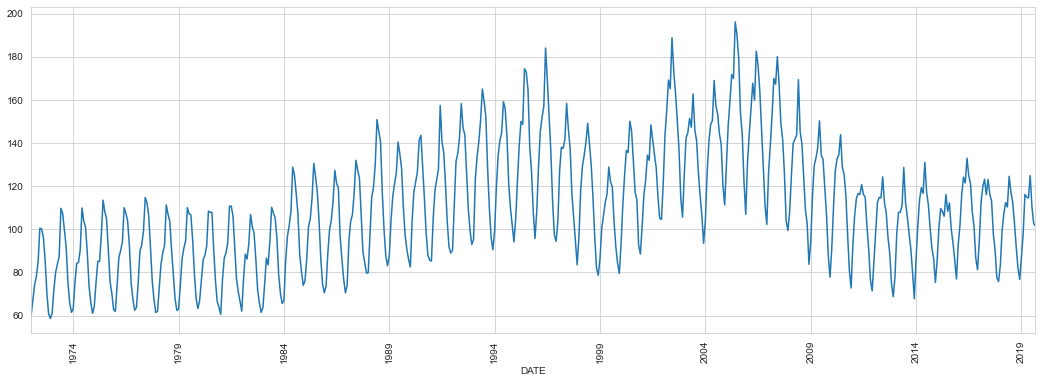

In [14]:
df['Production'].plot(figsize=(18,6))
plt.xticks(rotation=90);

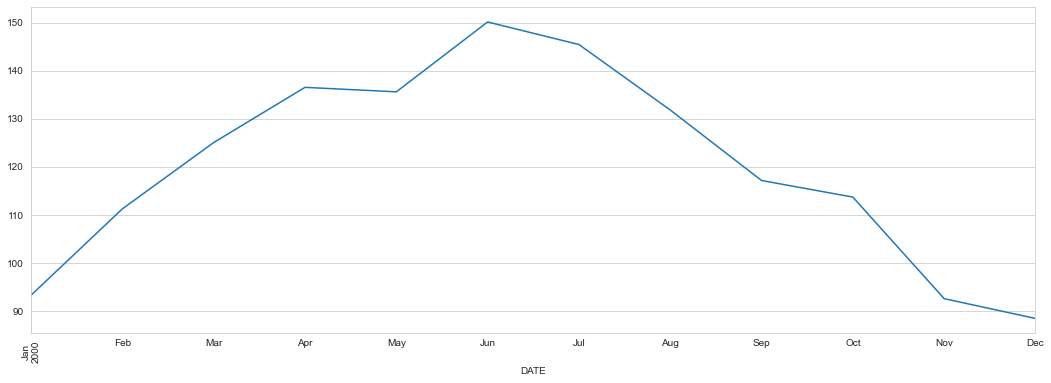

In [17]:
df['Production'].loc["2000-01-01" : "2000-12-01"].plot(figsize=(18,6))
plt.xticks(rotation=90);

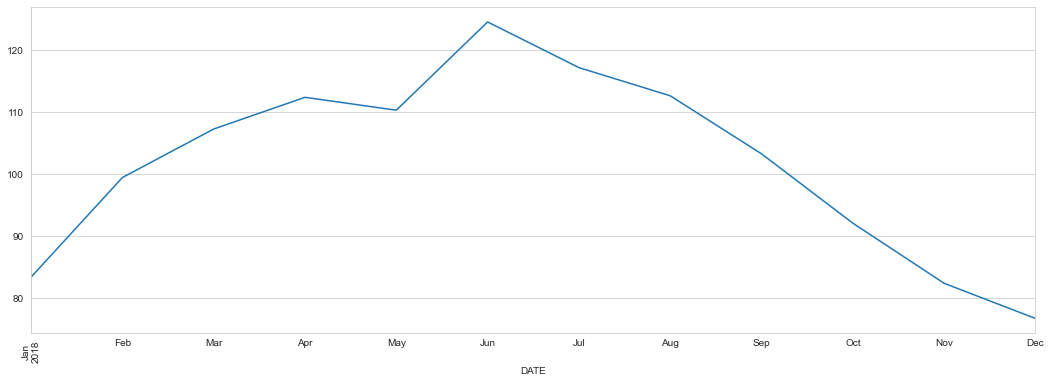

In [18]:
df['Production'].loc["2018-01-01" : "2018-12-01"].plot(figsize=(18,6))
plt.xticks(rotation=90);

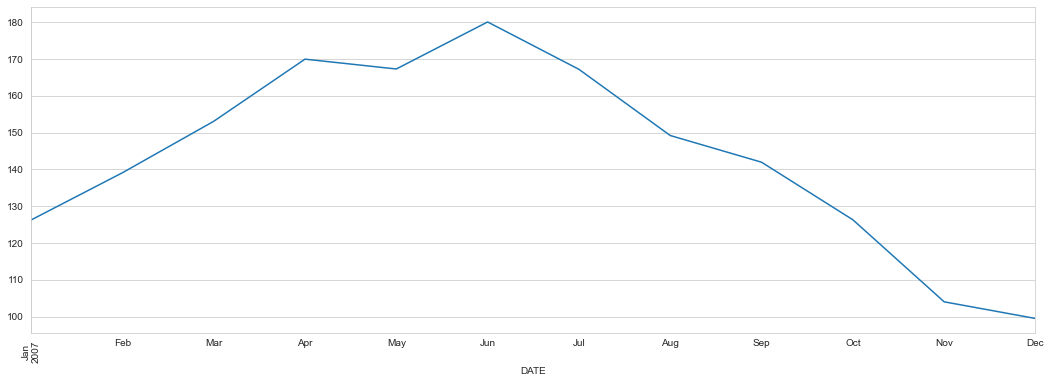

In [19]:
df['Production'].loc["2007-01-01" : "2007-12-01"].plot(figsize=(18,6))
plt.xticks(rotation=90);

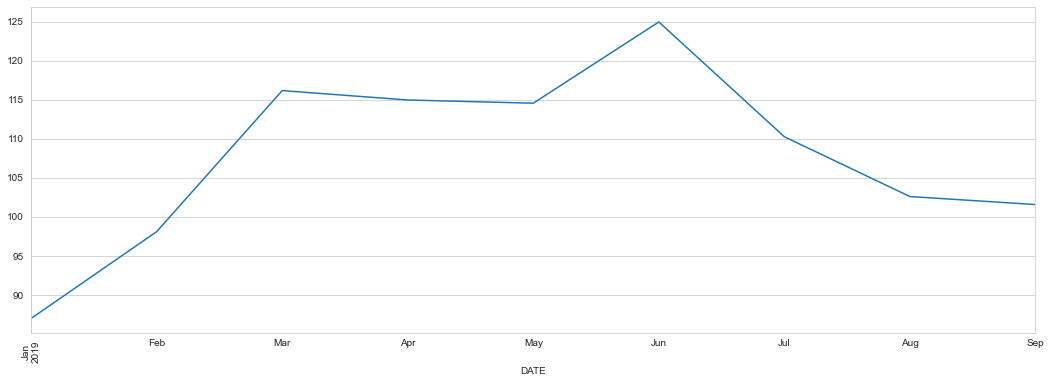

In [21]:
df['Production'].loc["2019-01-01" : "2019-12-01"].plot(figsize=(18,6))
plt.xticks(rotation=90);

# Preprocessing of Data

## Train Test Split

In [20]:
len(df)

573

In [ ]:
# How many rows per year?
12

In [27]:
test_ind = 12 + 12+9 # Last 33 rows of the data 2017+2018+2019

In [28]:
train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [29]:
train.shape, test.shape

((540, 1), (33, 1))

## Scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [34]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
length = 12 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(train_scaled, train_scaled, length=length, batch_size=batch_size)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length=length, batch_size=batch_size)

In [36]:
len(train_scaled), len(generator), len(test_scaled), len(validation_generator)

(540, 528, 33, 21)

In [38]:
n_features = train_scaled.shape[1]
n_features

1

# Modelling & Model Performance

## with "tanh" activation function

In [61]:
from tensorflow.keras import layers
from tensorflow.keras import activations

In [62]:
model = Sequential()

model.add(LSTM(100,input_shape=(length, n_features)))

model.add(layers.Dense(n_features))
model.add(layers.Activation(activations.tanh))

model.compile(optimizer='adam', loss='mse')

In [63]:
early_stop = EarlyStopping(monitor='val_loss',patience=5, restore_best_weights = True)

In [64]:
model.fit(x = generator,
          epochs=20,
          validation_data=validation_generator,
          callbacks=[early_stop])

Epoch 1/20
528/528 [==============================] - 7s 8ms/step - loss: 0.0181 - val_loss: 0.0022
Epoch 2/20
528/528 [==============================] - 4s 7ms/step - loss: 0.0050 - val_loss: 0.0025
Epoch 3/20
528/528 [==============================] - 4s 7ms/step - loss: 0.0039 - val_loss: 0.0018
Epoch 4/20
528/528 [==============================] - 4s 7ms/step - loss: 0.0038 - val_loss: 0.0019
Epoch 5/20
528/528 [==============================] - 3s 6ms/step - loss: 0.0035 - val_loss: 0.0022
Epoch 6/20
528/528 [==============================] - 4s 8ms/step - loss: 0.0036 - val_loss: 0.0032
Epoch 7/20
528/528 [==============================] - 4s 7ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 8/20
528/528 [==============================] - 3s 6ms/step - loss: 0.0035 - val_loss: 0.0034


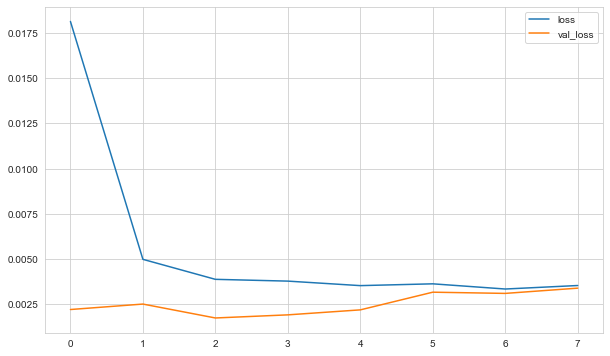

In [66]:
losses = pd.DataFrame(model.history.history)
losses.plot();

### Evaluation on Test Data

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [68]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [69]:
train_scaled

array([[0.00947104],
       [0.06108982],
       [0.11326273],
       [0.14145625],
       [0.18982663],
       [0.30495972],
       [0.30154406],
       [0.27416065],
       [0.19736841],
       [0.08532665],
       [0.01561588],
       [0.        ],
       [0.01774221],
       [0.09850931],
       [0.15590133],
       [0.18358944],
       [0.20878908],
       [0.37150354],
       [0.3542551 ],
       [0.29817568],
       [0.23973867],
       [0.12104304],
       [0.05289938],
       [0.02087498],
       [0.03141355],
       [0.12133246],
       [0.18622481],
       [0.18855185],
       [0.23182893],
       [0.37263651],
       [0.32891584],
       [0.30809031],
       [0.22409662],
       [0.10933731],
       [0.05452176],
       [0.01749278],
       [0.04076752],
       [0.12186114],
       [0.19277469],
       [0.19221257],
       [0.28139264],
       [0.39898221],
       [0.35985962],
       [0.3357137 ],
       [0.22874706],
       [0.12405219],
       [0.08404241],
       [0.029

In [70]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 [==============================] - 0s 21ms/step


In [71]:
predictions_scaled

[array([0.2217069], dtype=float32),
 array([0.28507194], dtype=float32),
 array([0.36145195], dtype=float32),
 array([0.4307281], dtype=float32),
 array([0.48453438], dtype=float32),
 array([0.51970124], dtype=float32),
 array([0.5144766], dtype=float32),
 array([0.47612348], dtype=float32),
 array([0.399346], dtype=float32),
 array([0.30714303], dtype=float32),
 array([0.22181696], dtype=float32),
 array([0.18428023], dtype=float32)]

In [72]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.5733523183982535 
mae: 0.07433569938294948 
mse: 0.006081608890775043 
rmse: 0.07798467087046686


### Inverse Transformation and Comparing

In [73]:
predictions = scaler.inverse_transform(predictions_scaled)
predictions = pd.DataFrame(data=predictions,columns=test.columns)
predictions

,Production
0,89.148
1,97.861
2,108.364
3,117.891
4,125.290
5,130.126
6,129.407
7,124.133
8,113.575
9,100.896


In [74]:
test_new = test[:length]

In [75]:
test_new

,Production
DATE,
2017-01-01,94.245
2017-02-01,112.388
2017-03-01,119.698
2017-04-01,123.228
2017-05-01,116.064
2017-06-01,123.087
2017-07-01,116.264
2017-08-01,113.172
2017-09-01,97.912


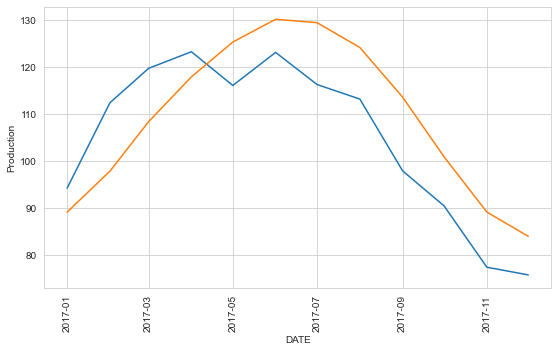

In [77]:
index = 0
plt.figure(figsize = (20, 30))

for i in test.columns:
    index += 1
    test_eva = pd.DataFrame(test_new[i])
    test_eva["predictions"] = predictions[i].values
    plt.subplot(5, 2, index)
    sns.lineplot(x = test_eva.index, y = test_eva[i])
    sns.lineplot(x = test_eva.index, y = test_eva.predictions)
    plt.xticks(rotation=90);

In [78]:
compare = test_new[["Production"]]
compare["prediction"] = predictions["Production"].values
compare

,Production,prediction
DATE,,
2017-01-01,94.245,89.148
2017-02-01,112.388,97.861
2017-03-01,119.698,108.364
2017-04-01,123.228,117.891
2017-05-01,116.064,125.290
2017-06-01,123.087,130.126
2017-07-01,116.264,129.407
2017-08-01,113.172,124.133
2017-09-01,97.912,113.575


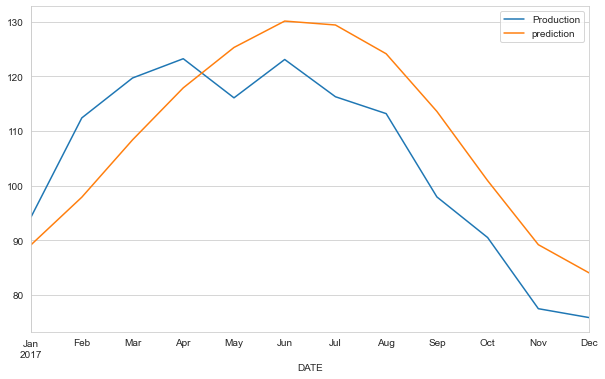

In [79]:
compare.plot();

## with "relu" activation function

In [80]:
model2 = Sequential()

model2.add(LSTM(100,input_shape=(length, n_features)))

model2.add(layers.Dense(n_features))
model2.add(layers.Activation(activations.relu))

model2.compile(optimizer='adam', loss='mse')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=5, restore_best_weights = True)

In [81]:
model2.fit(x = generator,
          epochs=20,
          validation_data=validation_generator,
          callbacks=[early_stop])

Epoch 1/20
528/528 [==============================] - 8s 8ms/step - loss: 0.0249 - val_loss: 0.0032
Epoch 2/20
528/528 [==============================] - 3s 6ms/step - loss: 0.0046 - val_loss: 0.0021
Epoch 3/20
528/528 [==============================] - 3s 6ms/step - loss: 0.0039 - val_loss: 0.0017
Epoch 4/20
528/528 [==============================] - 3s 6ms/step - loss: 0.0035 - val_loss: 0.0020
Epoch 5/20
528/528 [==============================] - 4s 7ms/step - loss: 0.0034 - val_loss: 0.0043
Epoch 6/20
528/528 [==============================] - 4s 7ms/step - loss: 0.0034 - val_loss: 0.0019
Epoch 7/20
528/528 [==============================] - 3s 6ms/step - loss: 0.0031 - val_loss: 0.0019
Epoch 8/20
528/528 [==============================] - 3s 6ms/step - loss: 0.0033 - val_loss: 0.0017
Epoch 9/20
528/528 [==============================] - 4s 7ms/step - loss: 0.0032 - val_loss: 0.0019
Epoch 10/20
528/528 [==============================] - 3s 7ms/step - loss: 0.0031 - val_loss: 0.0018

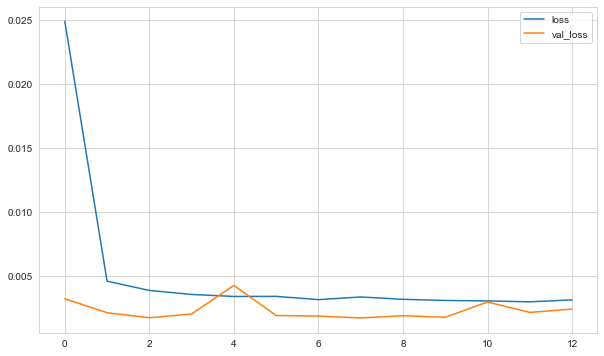

In [83]:
losses = pd.DataFrame(model2.history.history)
losses.plot();

### Evaluation on Test Data

In [88]:
predictions_scaled2 = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model2.predict(current_batch)
    
    # store prediction
    predictions_scaled2.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 [==============================] - 0s 26ms/step


In [89]:
predictions_scaled2

[array([0.21994962], dtype=float32),
 array([0.2806245], dtype=float32),
 array([0.34696072], dtype=float32),
 array([0.40354273], dtype=float32),
 array([0.44253138], dtype=float32),
 array([0.45978692], dtype=float32),
 array([0.44460902], dtype=float32),
 array([0.39981526], dtype=float32),
 array([0.3295649], dtype=float32),
 array([0.25631797], dtype=float32),
 array([0.20272228], dtype=float32),
 array([0.19150099], dtype=float32)]

In [90]:
eval_metrics(test_scaled[:length], predictions_scaled2)

r2_score: 0.7652232062088172 
mae: 0.04806590459131732 
mse: 0.0033466035280156816 
rmse: 0.05784983602410366


### Inverse Transformation and Comparing

In [91]:
predictions2 = scaler.inverse_transform(predictions_scaled2)
predictions2 = pd.DataFrame(data=predictions,columns=test.columns)
predictions2

,Production
0,89.148
1,97.861
2,108.364
3,117.891
4,125.290
5,130.126
6,129.407
7,124.133
8,113.575
9,100.896


In [95]:
test_new = test[:length]

In [96]:
test_new

,Production
DATE,
2017-01-01,94.245
2017-02-01,112.388
2017-03-01,119.698
2017-04-01,123.228
2017-05-01,116.064
2017-06-01,123.087
2017-07-01,116.264
2017-08-01,113.172
2017-09-01,97.912


In [97]:
compare = test_new[["Production"]]
compare["prediction"] = predictions2["Production"].values
compare

,Production,prediction
DATE,,
2017-01-01,94.245,89.148
2017-02-01,112.388,97.861
2017-03-01,119.698,108.364
2017-04-01,123.228,117.891
2017-05-01,116.064,125.290
2017-06-01,123.087,130.126
2017-07-01,116.264,129.407
2017-08-01,113.172,124.133
2017-09-01,97.912,113.575


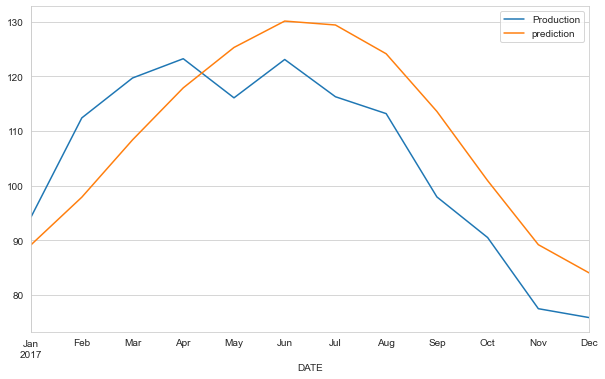

In [98]:
compare.plot();

# Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [99]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [100]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [101]:
model = Sequential()

model.add(LSTM(100,input_shape=(length, n_features)))

model.add(layers.Dense(n_features))
model.add(layers.Activation(activations.relu))

model.compile(optimizer='adam', loss='mse')

In [104]:
model.fit(x = generator, epochs=15)

Epoch 1/15
561/561 [==============================] - 4s 7ms/step - loss: 0.1832
Epoch 2/15
561/561 [==============================] - 4s 7ms/step - loss: 0.1832
Epoch 3/15
561/561 [==============================] - 3s 6ms/step - loss: 0.1832
Epoch 4/15
561/561 [==============================] - 4s 6ms/step - loss: 0.1832
Epoch 5/15
561/561 [==============================] - 4s 7ms/step - loss: 0.1832
Epoch 6/15
561/561 [==============================] - 4s 7ms/step - loss: 0.1832
Epoch 7/15
561/561 [==============================] - 3s 6ms/step - loss: 0.1832
Epoch 8/15
561/561 [==============================] - 4s 7ms/step - loss: 0.1832
Epoch 9/15
561/561 [==============================] - 4s 7ms/step - loss: 0.1832
Epoch 10/15
561/561 [==============================] - 3s 6ms/step - loss: 0.1832
Epoch 11/15
561/561 [==============================] - 4s 7ms/step - loss: 0.1832
Epoch 12/15
561/561 [==============================] - 3s 6ms/step - loss: 0.1832
Epoch 13/15
561/561 [====

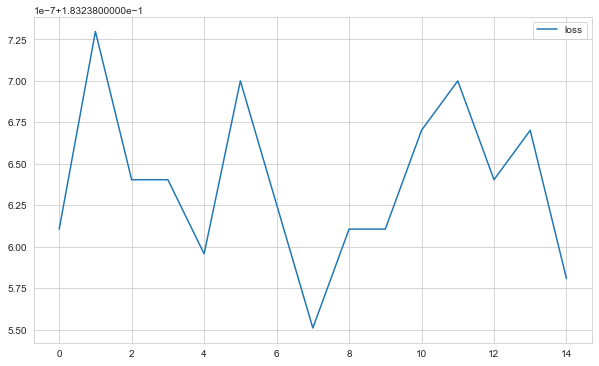

In [105]:
losses = pd.DataFrame(model.history.history)
losses.plot();

In [106]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 [==============================] - 0s 23ms/step


In [107]:
forecast = full_scaler.inverse_transform(predictions_scaled)
forecast

array([[ 88.90592977],
       [ 97.24957065],
       [106.37172222],
       [114.15253424],
       [119.51401553],
       [121.88689278],
       [119.79971979],
       [113.63995587],
       [103.97955459],
       [ 93.90708413],
       [ 86.53693151],
       [ 84.99384821]])

In [108]:
df.tail()

,Production
DATE,
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263
2019-08-01,102.609
2019-09-01,101.587


In [112]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'M')
forecast_index

DatetimeIndex(['2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30'],
              dtype='datetime64[ns]', freq='M')

In [113]:
forecast_df = pd.DataFrame(data = forecast[:,:1], index = forecast_index, columns = ['Forecast'])
forecast_df

,Forecast
2019-10-31,88.906
2019-11-30,97.250
2019-12-31,106.372
2020-01-31,114.153
2020-02-29,119.514
2020-03-31,121.887
2020-04-30,119.800
2020-05-31,113.640
2020-06-30,103.980
2020-07-31,93.907


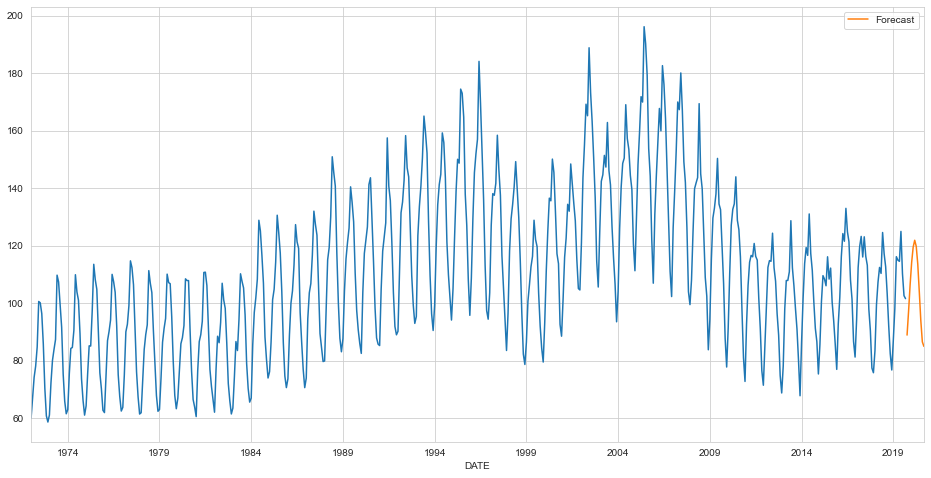

In [114]:
ax = df["Production"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(528.0, 608.0)

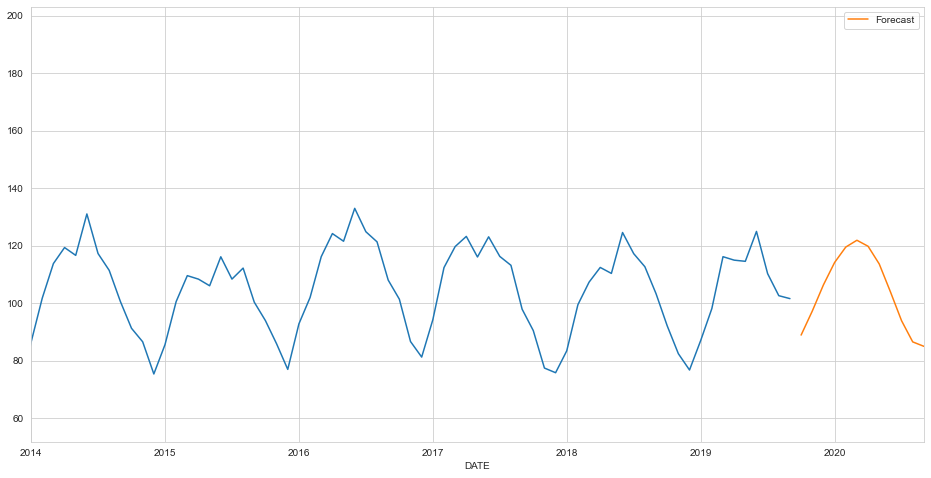

In [116]:
ax = df["Production"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim("2014-01-01", "2020-09-30")

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___